# *Prepare Data*

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split

In [2]:
root = "/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2/Train/"
X_train = []
X_train_noisy = []
for folder in os.listdir(root):
    subdir = root +folder 
    for img_file in os.listdir(subdir):
        img = cv2.imread(subdir+ "/" +img_file)
        img = cv2.resize(img,(256,256))
        X_train.append(img)
        if(len(X_train) > 500):
            break

X_train = np.array(X_train)
X_train = np.array(X_train)/255
print("X_train", X_train.shape)


X_train (510, 256, 256, 3)


In [3]:
X_train, X_test = train_test_split(X_train, test_size=0.2, random_state=1)

In [4]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

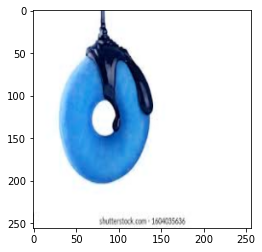

In [5]:
plt.imshow(X_train[0])
plt.show()

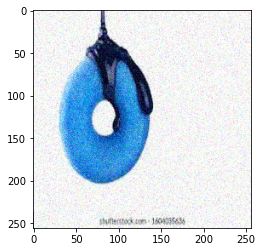

In [6]:
plt.imshow(X_train_noisy[0])
plt.show()

# *Build 4 AutoEncoders*

# AutoEncoder_8

In [7]:
encoder_8 = keras.models.Sequential([
    keras.layers.Input(shape=(256, 256, 3), name="input"),
    keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.MaxPooling2D((2, 2), name="encoded")
])

decoder_8 = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(3, (3, 3), padding='same', name="decoded")
])

autoencoder_8 = keras.models.Sequential([keras.layers.Input(shape=(256, 256, 3)), encoder_8, decoder_8])

In [8]:
autoencoder_8.compile(optimizer='adam', loss='mse')
autoencoder_8.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 8, 8, 32)          6216      
_________________________________________________________________
sequential_1 (Sequential)    (None, 256, 256, 3)       15583     
Total params: 21,799
Trainable params: 21,799
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder_8.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Train on 408 samples, validate on 102 samples
Epoch 1/100
408/408 [==============================] - 9s 23ms/sample - loss: 0.4127 - val_loss: 0.2869
Epoch 2/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.2202 - val_loss: 0.1363
Epoch 3/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.1123 - val_loss: 0.0850
Epoch 4/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0796 - val_loss: 0.0707
Epoch 5/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0655 - val_loss: 0.0565
Epoch 6/100
408/408 [==============================] - 2s 4ms/sample - loss: 0.0545 - val_loss: 0.0491
Epoch 7/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0498 - val_loss: 0.0461
Epoch 8/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0467 - val_loss: 0.0434
Epoch 9/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0438 - val_loss: 0.0415
Epoch 10/100
408/408 [====

# AutoEncoder_16

In [10]:
encoder_16 = keras.models.Sequential([
    keras.layers.Input(shape=(256, 256, 3), name="input"),
    keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2), name="encoded")
])

decoder_16 = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(3, (3, 3), padding='same', name="decoded")
])

autoencoder_16 = keras.models.Sequential([keras.layers.Input(shape=(256, 256, 3)), encoder_16, decoder_16])

In [11]:
autoencoder_16.compile(optimizer='adam', loss='mse')
autoencoder_16.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 16, 16, 32)        6216      
_________________________________________________________________
sequential_4 (Sequential)    (None, 256, 256, 3)       15435     
Total params: 21,651
Trainable params: 21,651
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder_16.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Train on 408 samples, validate on 102 samples
Epoch 1/100
408/408 [==============================] - 3s 6ms/sample - loss: 0.3404 - val_loss: 0.1773
Epoch 2/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.1119 - val_loss: 0.0890
Epoch 3/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0799 - val_loss: 0.0686
Epoch 4/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0634 - val_loss: 0.0518
Epoch 5/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0488 - val_loss: 0.0437
Epoch 6/100
408/408 [==============================] - 2s 4ms/sample - loss: 0.0422 - val_loss: 0.0382
Epoch 7/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0377 - val_loss: 0.0349
Epoch 8/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0346 - val_loss: 0.0334
Epoch 9/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0324 - val_loss: 0.0308
Epoch 10/100
408/408 [=====

# AutoEncoder_32

In [13]:
encoder_32 = keras.models.Sequential([
    keras.layers.Input(shape=(256, 256, 3), name="input"),
    keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2), name="encoded")
])

decoder_32 = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(3, (3, 3), padding='same', name="decoded")
])

autoencoder_32 = keras.models.Sequential([keras.layers.Input(shape=(256, 256, 3)), encoder_32, decoder_32])

In [14]:
autoencoder_32.compile(optimizer='adam', loss='mse')
autoencoder_32.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 16, 16, 32)        6216      
_________________________________________________________________
sequential_7 (Sequential)    (None, 256, 256, 3)       15435     
Total params: 21,651
Trainable params: 21,651
Non-trainable params: 0
_________________________________________________________________


In [15]:
autoencoder_32.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Train on 408 samples, validate on 102 samples
Epoch 1/100
408/408 [==============================] - 3s 6ms/sample - loss: 0.1705 - val_loss: 0.1002
Epoch 2/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0809 - val_loss: 0.0565
Epoch 3/100
408/408 [==============================] - 2s 4ms/sample - loss: 0.0502 - val_loss: 0.0441
Epoch 4/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0427 - val_loss: 0.0387
Epoch 5/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0378 - val_loss: 0.0358
Epoch 6/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0349 - val_loss: 0.0334
Epoch 7/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0320 - val_loss: 0.0301
Epoch 8/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0299 - val_loss: 0.0287
Epoch 9/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0285 - val_loss: 0.0280
Epoch 10/100
408/408 [=====

# AutoEncoder_64

In [16]:
encoder_64 = keras.models.Sequential([
    keras.layers.Input(shape=(256, 256, 3), name="input"),
    keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2), name="encoded")
])

decoder_64 = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(3, (3, 3), padding='same', name="decoded")
])

autoencoder_64 = keras.models.Sequential([keras.layers.Input(shape=(256, 256, 3)), encoder_64, decoder_64])

In [17]:
autoencoder_64.compile(optimizer='adam', loss='mse')
autoencoder_64.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 16, 16, 32)        6216      
_________________________________________________________________
sequential_10 (Sequential)   (None, 256, 256, 3)       15435     
Total params: 21,651
Trainable params: 21,651
Non-trainable params: 0
_________________________________________________________________


In [18]:
autoencoder_64.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Train on 408 samples, validate on 102 samples
Epoch 1/100
408/408 [==============================] - 2s 6ms/sample - loss: 0.2511 - val_loss: 0.1475
Epoch 2/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.1270 - val_loss: 0.0879
Epoch 3/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0797 - val_loss: 0.0672
Epoch 4/100
408/408 [==============================] - 2s 4ms/sample - loss: 0.0630 - val_loss: 0.0535
Epoch 5/100
408/408 [==============================] - 2s 4ms/sample - loss: 0.0491 - val_loss: 0.0418
Epoch 6/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0407 - val_loss: 0.0378
Epoch 7/100
408/408 [==============================] - 1s 4ms/sample - loss: 0.0362 - val_loss: 0.0340
Epoch 8/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0325 - val_loss: 0.0305
Epoch 9/100
408/408 [==============================] - 1s 3ms/sample - loss: 0.0300 - val_loss: 0.0285
Epoch 10/100
408/408 [=====

# *Save models*

In [19]:
autoencoder_8.save("autoencoder_8.h5")
autoencoder_16.save("autoencoder_16.h5")
autoencoder_32.save("autoencoder_32.h5")
autoencoder_64.save("autoencoder_64.h5")

# *Test Set Images*

In [20]:
def plot_imgs(original_imgs, pca_imgs, ae_imgs, size=10):
    figure, axis = plt.subplots(3, 3)
    axis[0, 0].imshow(original_imgs[0])
    axis[0, 1].imshow(original_imgs[1])
    axis[0, 2].imshow(original_imgs[2])
    axis[1, 0].imshow(pca_imgs[0])
    axis[1, 1].imshow(pca_imgs[1])
    axis[1, 2].imshow(pca_imgs[2])
    axis[2, 0].imshow(ae_imgs[0])
    axis[2, 1].imshow(ae_imgs[1])
    axis[2, 2].imshow(ae_imgs[2])
    plt.rcParams["figure.figsize"] = (size,size)

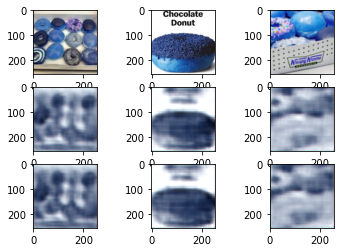

In [21]:
reconstructed_8_test = autoencoder_8.predict(X_test_noisy[:5])
encoded_imgs_8_test = encoder_8.predict(X_test[:5])
decoded_imgs_8_test = decoder_8(encoded_imgs_8_test)
plot_imgs(X_test[:5], reconstructed_8_test, decoded_imgs_8_test)

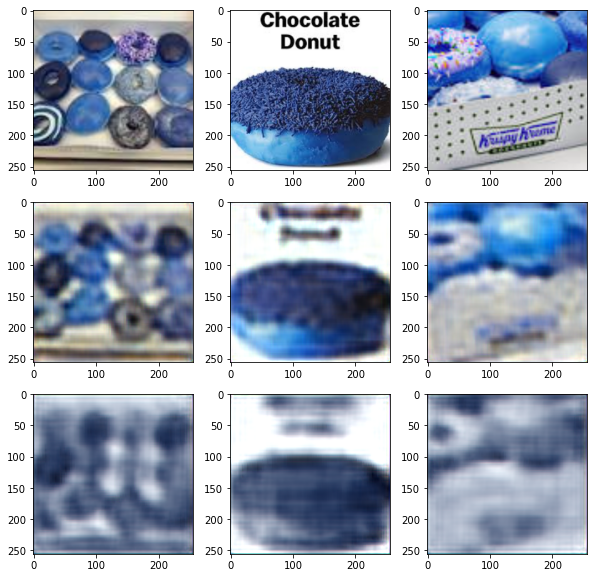

In [22]:
reconstructed_32_test = autoencoder_32.predict(X_test_noisy[:5])
encoded_imgs_32_test = encoder_8.predict(X_test[:5])
decoded_imgs_32_test = decoder_8(encoded_imgs_32_test)
plot_imgs(X_test[:5], reconstructed_32_test, decoded_imgs_32_test)

# *Custom Images*

In [23]:
from PIL import Image
import requests
from io import BytesIO
import cv2

url_1 = "https://i.imgur.com/hiuTVjF.jpeg"
url_2 = "https://i.imgur.com/rPgOzxO.jpeg"
url_3 = "https://i.imgur.com/4YuldRW.jpeg"
urls = [url_1, url_2, url_3]

imgs = []
def read_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((256, 256))
    img = np.array(img)/255
    return img

for url in urls:
    imgs.append(read_image(url))
    
imgs = np.array(imgs)

In [24]:
imgs_noisy = imgs + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=imgs.shape)
imgs_noisy = np.clip(imgs_noisy, 0., 1.)

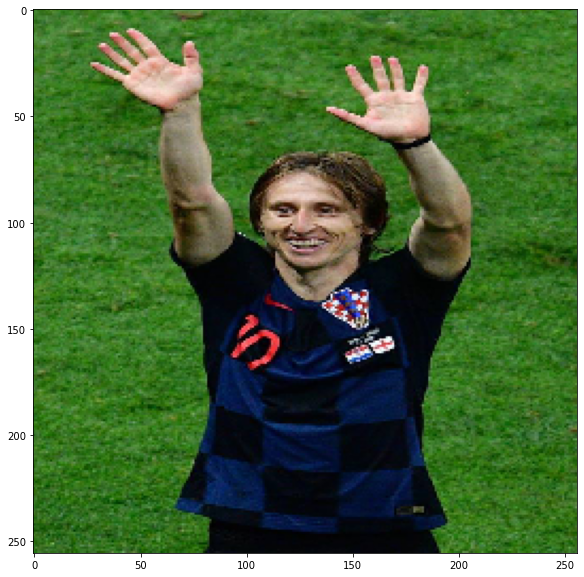

In [25]:
plt.imshow(imgs[0])

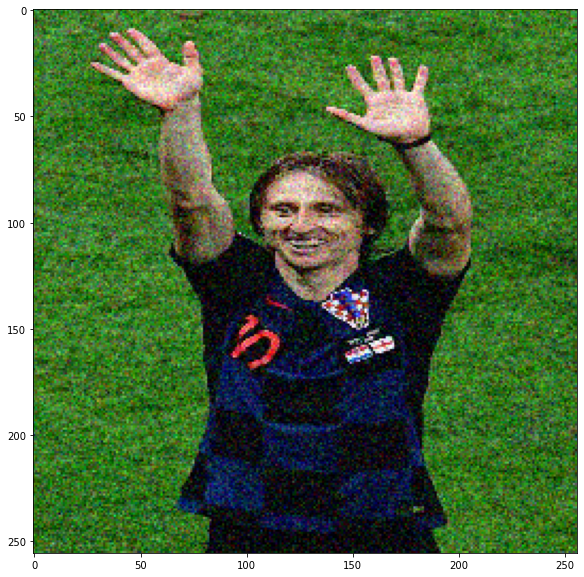

In [26]:
plt.imshow(imgs_noisy[0])

Encoding custom images using an autoencoder with an encoded vector of size 8 and 32

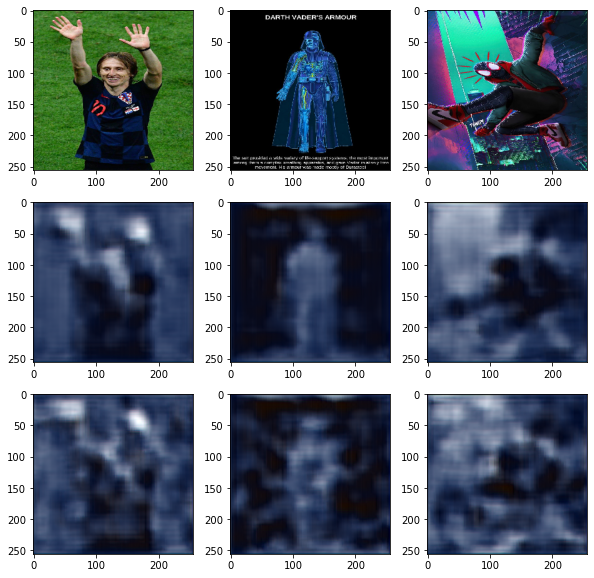

In [27]:
reconstructed_8 = autoencoder_8.predict(imgs_noisy)
encoded_imgs_8 = encoder_8.predict(imgs)
encoded_imgs_8_noisy = encoded_imgs_8 + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=encoded_imgs_8.shape)
encoded_imgs_8_noisy = np.clip(encoded_imgs_8_noisy, 0., 1.)
decoded_imgs_8 = decoder_8(encoded_imgs_8_noisy)
plot_imgs(imgs, reconstructed_8, decoded_imgs_8)

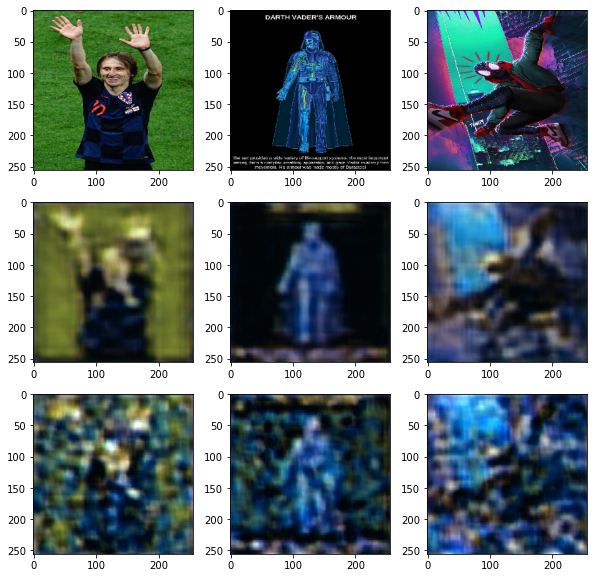

In [28]:
reconstructed_32 = autoencoder_32.predict(imgs_noisy)
encoded_imgs_32 = encoder_32.predict(imgs)
encoded_imgs_32_noisy = encoded_imgs_32 + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=encoded_imgs_32.shape)
encoded_imgs_32_noisy = np.clip(encoded_imgs_32_noisy, 0., 1.)
decoded_imgs_32 = decoder_32(encoded_imgs_32_noisy)
plot_imgs(imgs, reconstructed_32, decoded_imgs_32)

# *Bonus*

In [29]:
from sklearn.decomposition import PCA
def pca(img, n_component):
    blue,green,red = cv2.split(img)

    pca = PCA(n_component)
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)

    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)

    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    
    img_compressed = cv2.merge([blue_inverted, green_inverted, red_inverted])

    
    return img_compressed

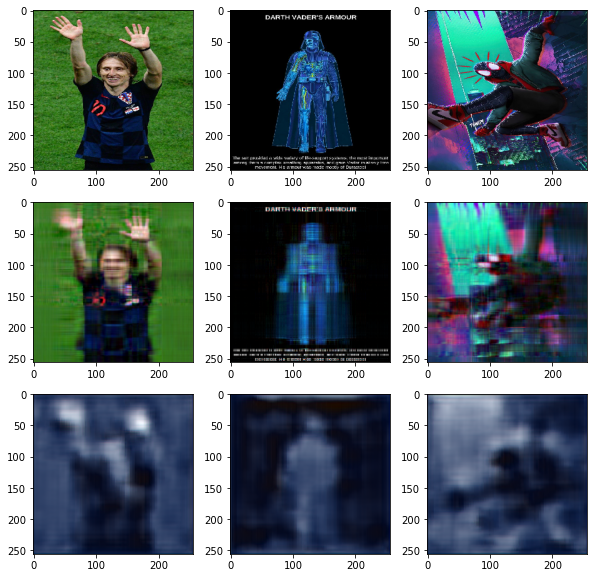

In [30]:
imgs_pca_8 = []
for img in imgs:
    imgs_pca_8.append(pca(img, 8))
    
imgs_ae_8 = autoencoder_8.predict(imgs)

plot_imgs(imgs, imgs_pca_8, imgs_ae_8)

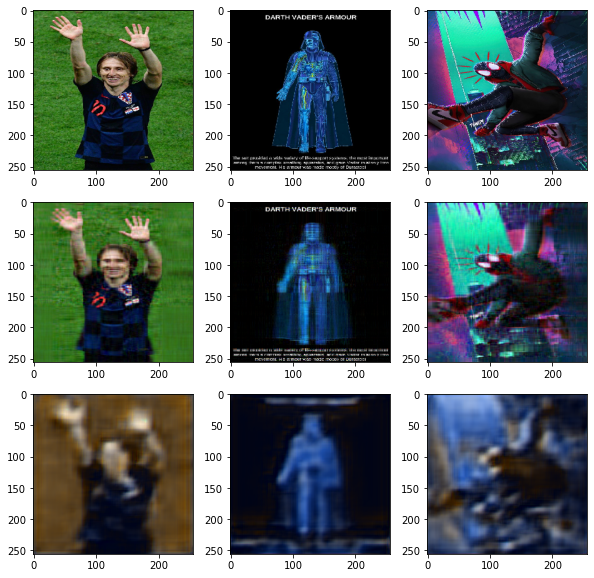

In [31]:
imgs_pca_16 = []
for img in imgs:
    imgs_pca_16.append(pca(img, 16))
    
imgs_ae_16 = autoencoder_16.predict(imgs)

plot_imgs(imgs, imgs_pca_16, imgs_ae_16)

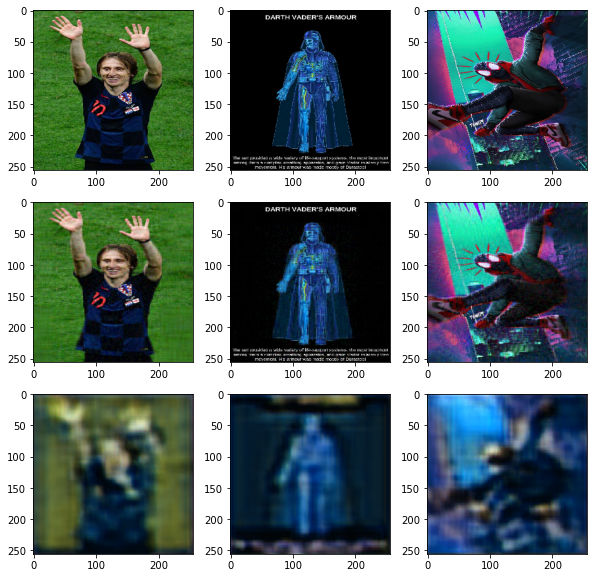

In [32]:
imgs_pca_32 = []
for img in imgs:
    imgs_pca_32.append(pca(img, 32))
    
imgs_ae_32 = autoencoder_32.predict(imgs)

plot_imgs(imgs, imgs_pca_32, imgs_ae_32)

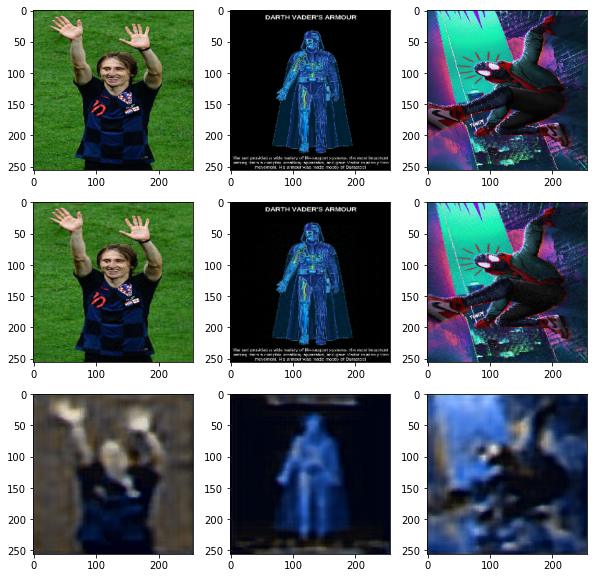

In [33]:
imgs_pca_64 = []
for img in imgs:
    imgs_pca_64.append(pca(img, 64))
    
imgs_ae_64 = autoencoder_64.predict(imgs)

plot_imgs(imgs, imgs_pca_64, imgs_ae_64)

I believe that the two most important factors are the number of training data and the size of the encoded vector, using only 400 images for trainig gave us somewhat accepatble results but I believe with more training time we might've gotten ourselves good results.
For the bonus part, it is clear that the PCA outperforms the regular autoencoder in compressing and decompressing images, this could also go back to the  size of the encoded vector and the training data size.

---